In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 
import seaborn as sns
import os
# import snapatac2 as snap

In [2]:
import session_info
session_info.show()

In [4]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [6]:
sc.settings.set_figure_params(dpi=80,dpi_save=300)

In [7]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'

# Read in cellname-change dictionary which also defines cell order

In [8]:
celltype_rename = utils.read_pkl('/nfs/team205/heart/anndata_objects/Foetal/fine_grain_rename_dictionary.pkl')
finegrain_order = list(celltype_rename.keys())

# Read in anndata (peak)

In [9]:
peakmatrix_dir = '/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/PeakMatrix'

In [10]:
# peak matrix, not-binarised
adata = sc.read_h5ad(f'{peakmatrix_dir}/Foetal_Peaks_tfidf.h5ad')

In [11]:
# rename fine_grain cell types
adata.obs['fine_grain'] = [celltype_rename[x] for x in adata.obs['fine_grain']]

In [12]:
adata

AnnData object with n_obs × n_vars = 167022 × 508040
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

In [13]:
adata.X.data[:10]

array([1.768611 , 1.9229858, 3.635446 , 1.3192275, 1.4049321, 1.8123279,
       1.6739427, 2.9703567, 3.3852873, 1.2617257], dtype=float32)

# Get accessible proportion matrix

In [14]:
# accessible matrix
acc_mat = utils.get_exp_proportion(adata, groupby='fine_grain', use_rep='X')

# Read in DA results

In [15]:
dar_res_dir = '/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/MarkerPeaks'
os.listdir(dar_res_dir)

['SANP-vs-aCM.csv',
 'global_FDR001.csv',
 '.ipynb_checkpoints',
 'archive',
 'per-mid-grain.csv',
 'Mesenchymal_fine-grain_all.csv',
 'Cardiomyocytes_fine-grain_all.csv',
 'Leukocytes_fine-grain_all.csv',
 'Endothelium_fine-grain_all.csv',
 'Epicardium_fine-grain_all.csv',
 'Neural_fine-grain_all.csv',
 'global_coarse-grain_FDR005_logFC1.csv',
 'vCM_Left_Trab-vs-Compact.csv',
 'vCM_Left_Compact-vs-Trab.csv',
 'aCM-vs-SANP.csv']

In [16]:
DAR_res={}
for file in os.listdir(dar_res_dir):
    if '_fine-grain_all.csv' in file:
        celltype = file.split('_fine-grain_all.csv')[0]
        # read in 
        df = pd.read_csv(f'{dar_res_dir}/{file}')
        # make peak names
        df['names'] = df['seqnames']+':'+df['start'].astype('str')+'_'+df['end'].astype('str')
        # add to the dictionary
        DAR_res[celltype] = df.copy()
DAR_res.keys()

dict_keys(['Mesenchymal', 'Cardiomyocytes', 'Leukocytes', 'Endothelium', 'Epicardium', 'Neural'])

In [17]:
DAR_res['Cardiomyocytes'].head()

,seqnames,idx,start,end,Log2FC,FDR,MeanDiff,celltype,names
0,chr12,19452,110920394,110920894,-2.198110,5.558942e-14,-0.199694,AtrialCardiomyocytesCycling,chr12:110920394_110920894
1,chr1,1638,3423278,3423778,-3.356119,2.185083e-10,-0.241721,AtrialCardiomyocytesCycling,chr1:3423278_3423778
2,chr16,8997,54286746,54287246,-2.112676,2.266461e-09,-0.239348,AtrialCardiomyocytesCycling,chr16:54286746_54287246
3,chr3,8364,46863292,46863792,-2.917176,9.414292e-09,-0.252555,AtrialCardiomyocytesCycling,chr3:46863292_46863792
4,chr16,2418,4466053,4466553,-3.586999,1.307910e-08,-0.153975,AtrialCardiomyocytesCycling,chr16:4466053_4466553


In [19]:
res

,seqnames,idx,start,end,Log2FC,FDR,MeanDiff,celltype,names
0,chr5,19208,142907045,142907545,4.272756,3.344044e-16,0.405972,CoronaryPericytes,chr5:142907045_142907545
1,chr9,22044,137368446,137368946,3.612521,3.344044e-16,0.485626,CoronaryPericytes,chr9:137368446_137368946
2,chr14,3880,52845055,52845555,6.692149,7.572179e-15,0.299593,CoronaryPericytes,chr14:52845055_52845555
3,chr15,15679,95845850,95846350,4.541234,7.572179e-15,0.283401,CoronaryPericytes,chr15:95845850_95846350
4,chr3,9672,50333665,50334165,3.868315,7.572179e-15,0.399623,CoronaryPericytes,chr3:50333665_50334165
...,...,...,...,...,...,...,...,...,...
6539368,chrX,8484,155027130,155027630,-0.989384,1.000000e+00,-0.051549,ValveInterstitialCells,chrX:155027130_155027630
6539369,chrX,8498,155216171,155216671,0.080071,1.000000e+00,0.008879,ValveInterstitialCells,chrX:155216171_155216671
6539370,chrX,8505,155333298,155333798,0.133332,1.000000e+00,0.000597,ValveInterstitialCells,chrX:155333298_155333798
6539371,chrX,8509,155611247,155611747,-0.198444,1.000000e+00,-0.000532,ValveInterstitialCells,chrX:155611247_155611747


# Defining peaks and plot cluster map

##### Mesenchymal #####
specific peaks: 2755
conserved peaks: 427


/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


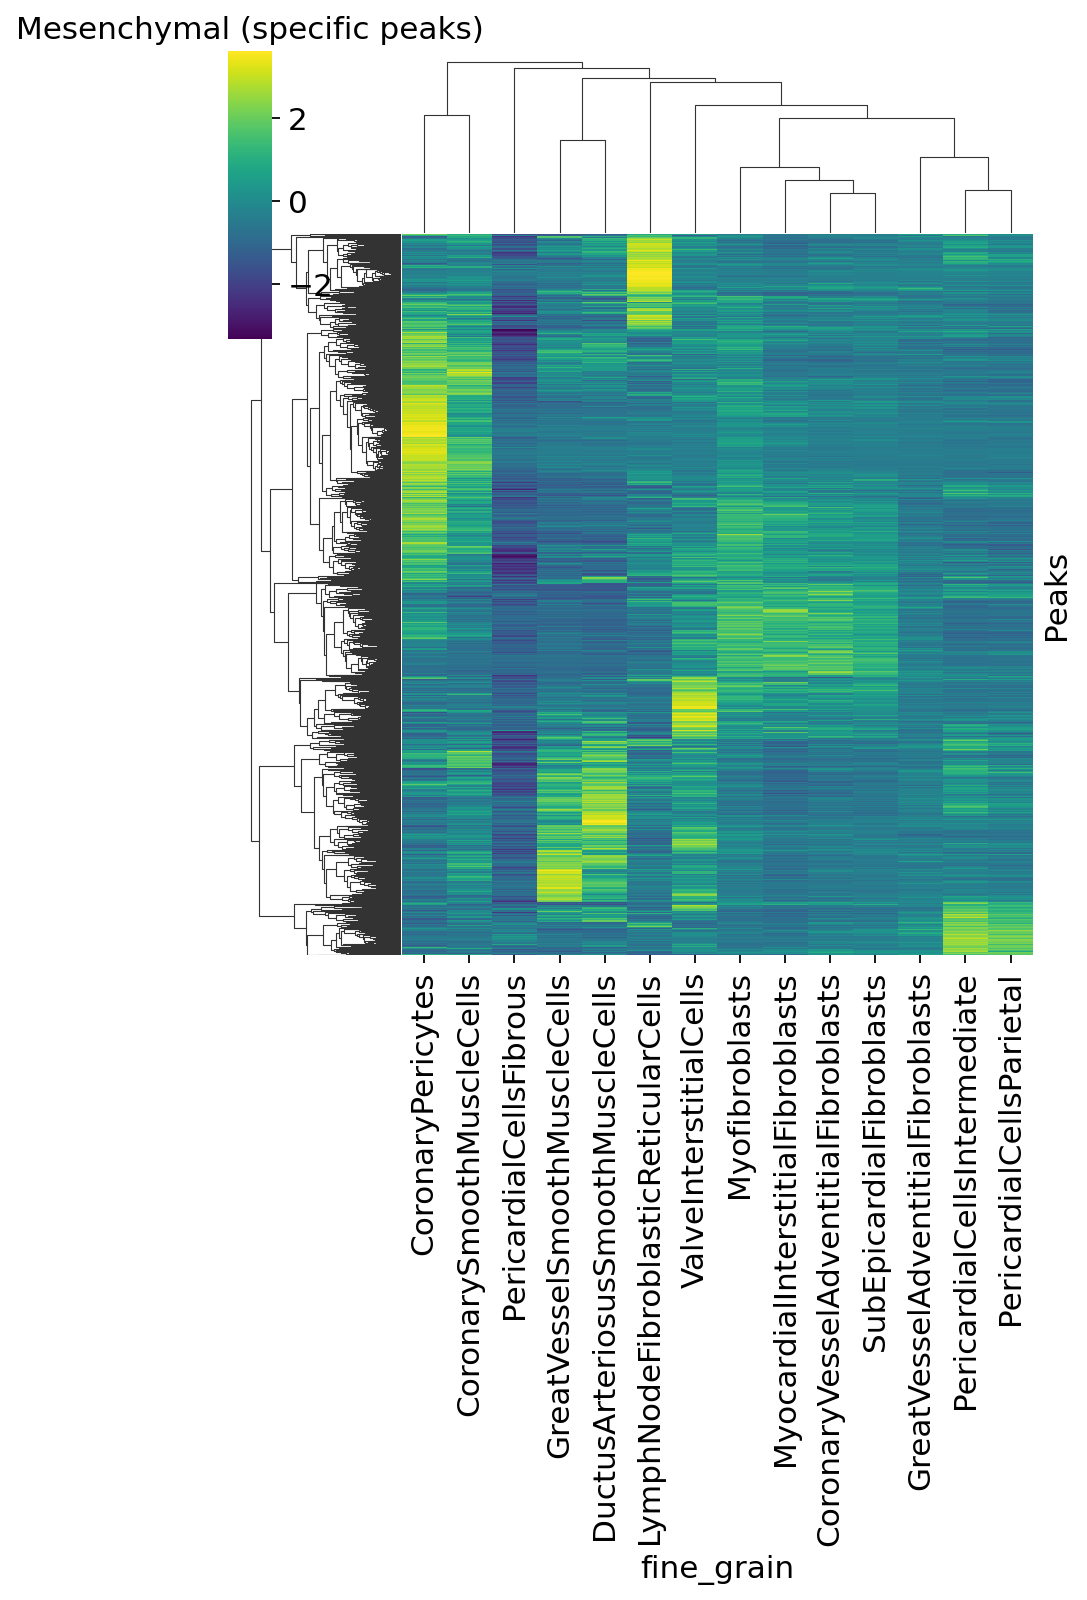

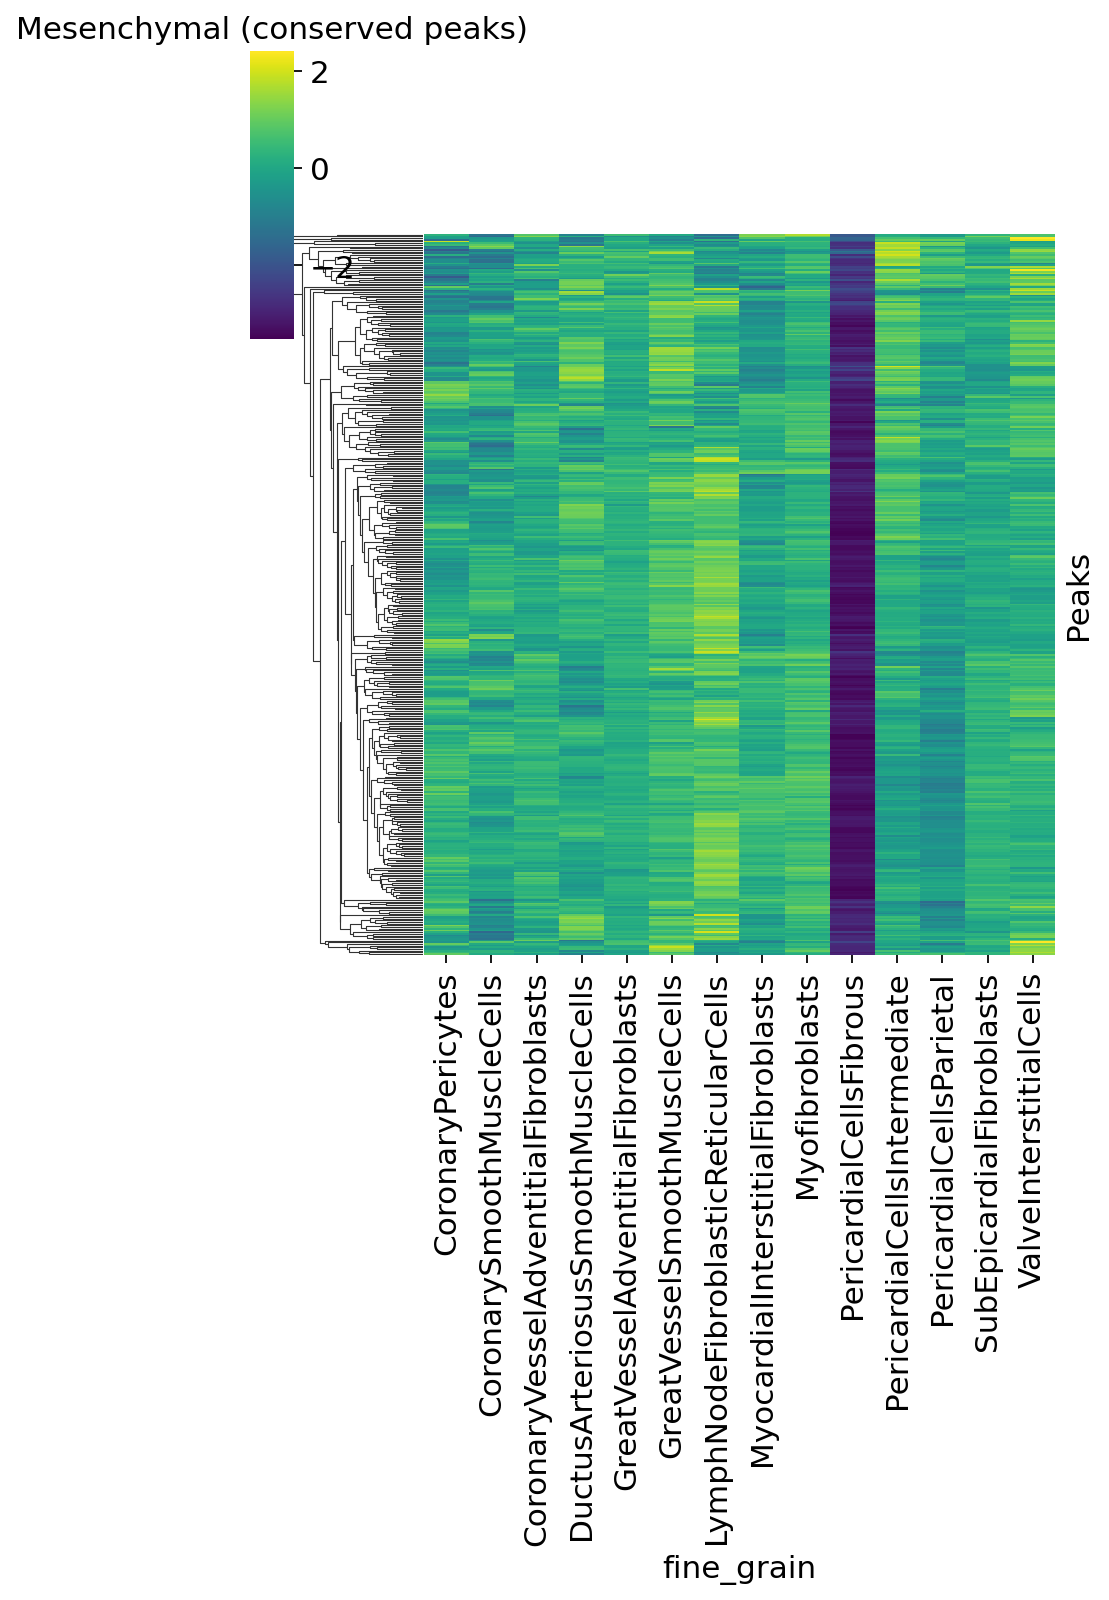


##### Cardiomyocytes #####
specific peaks: 857
conserved peaks: 1492


/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


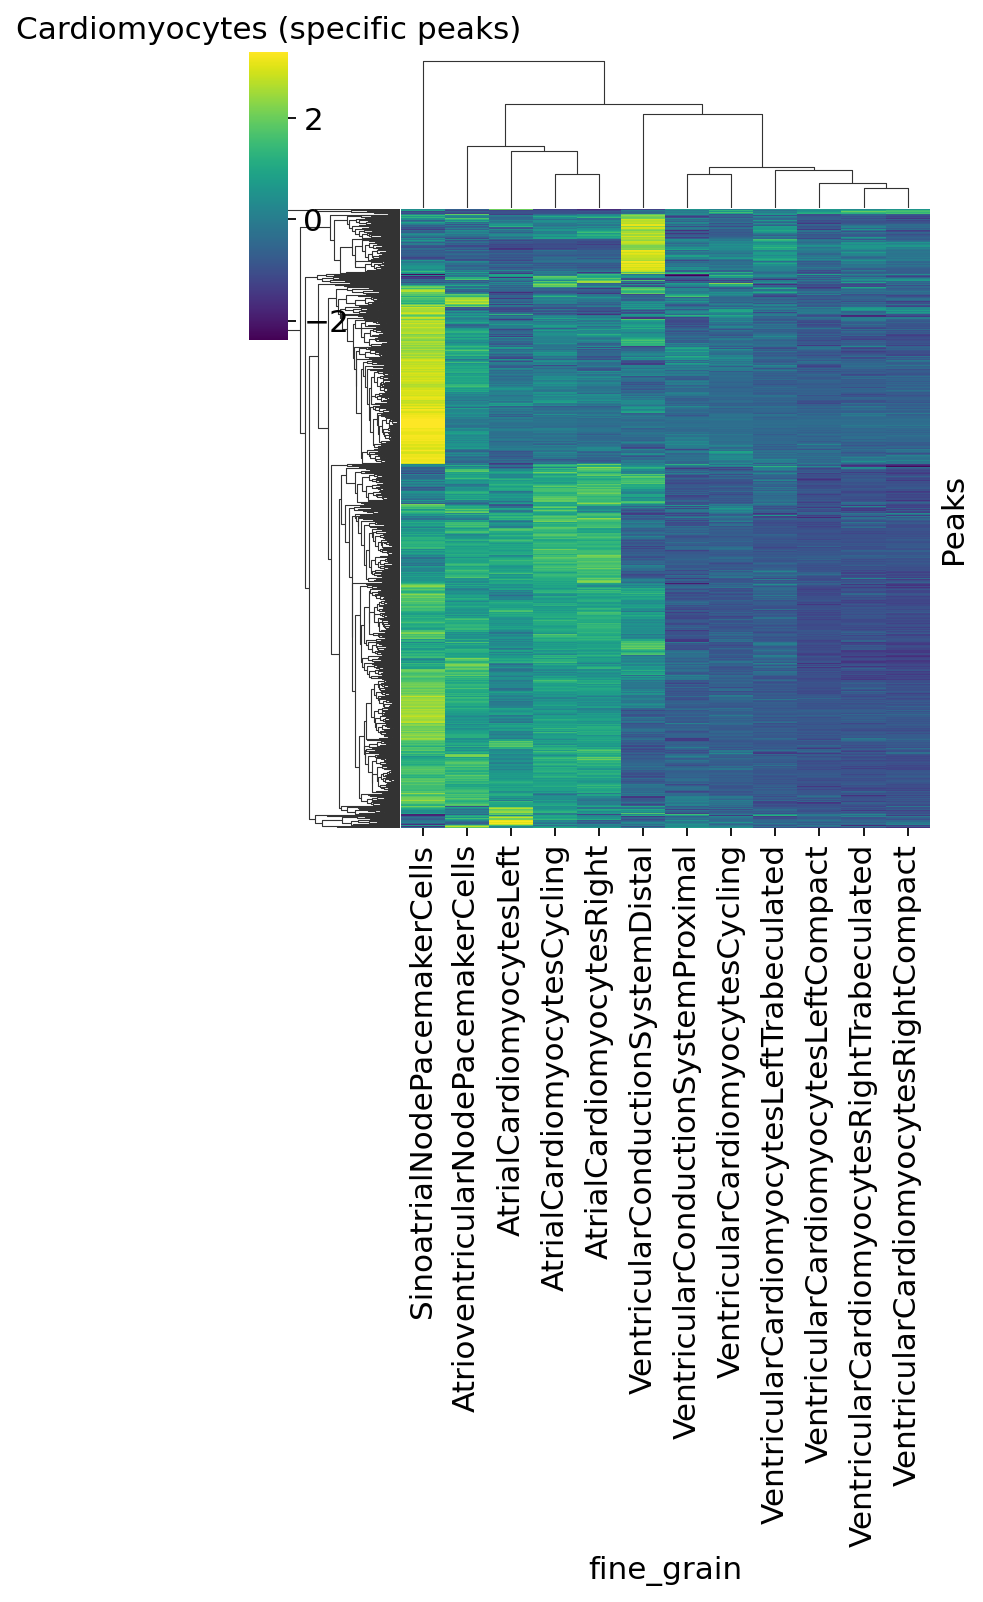

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


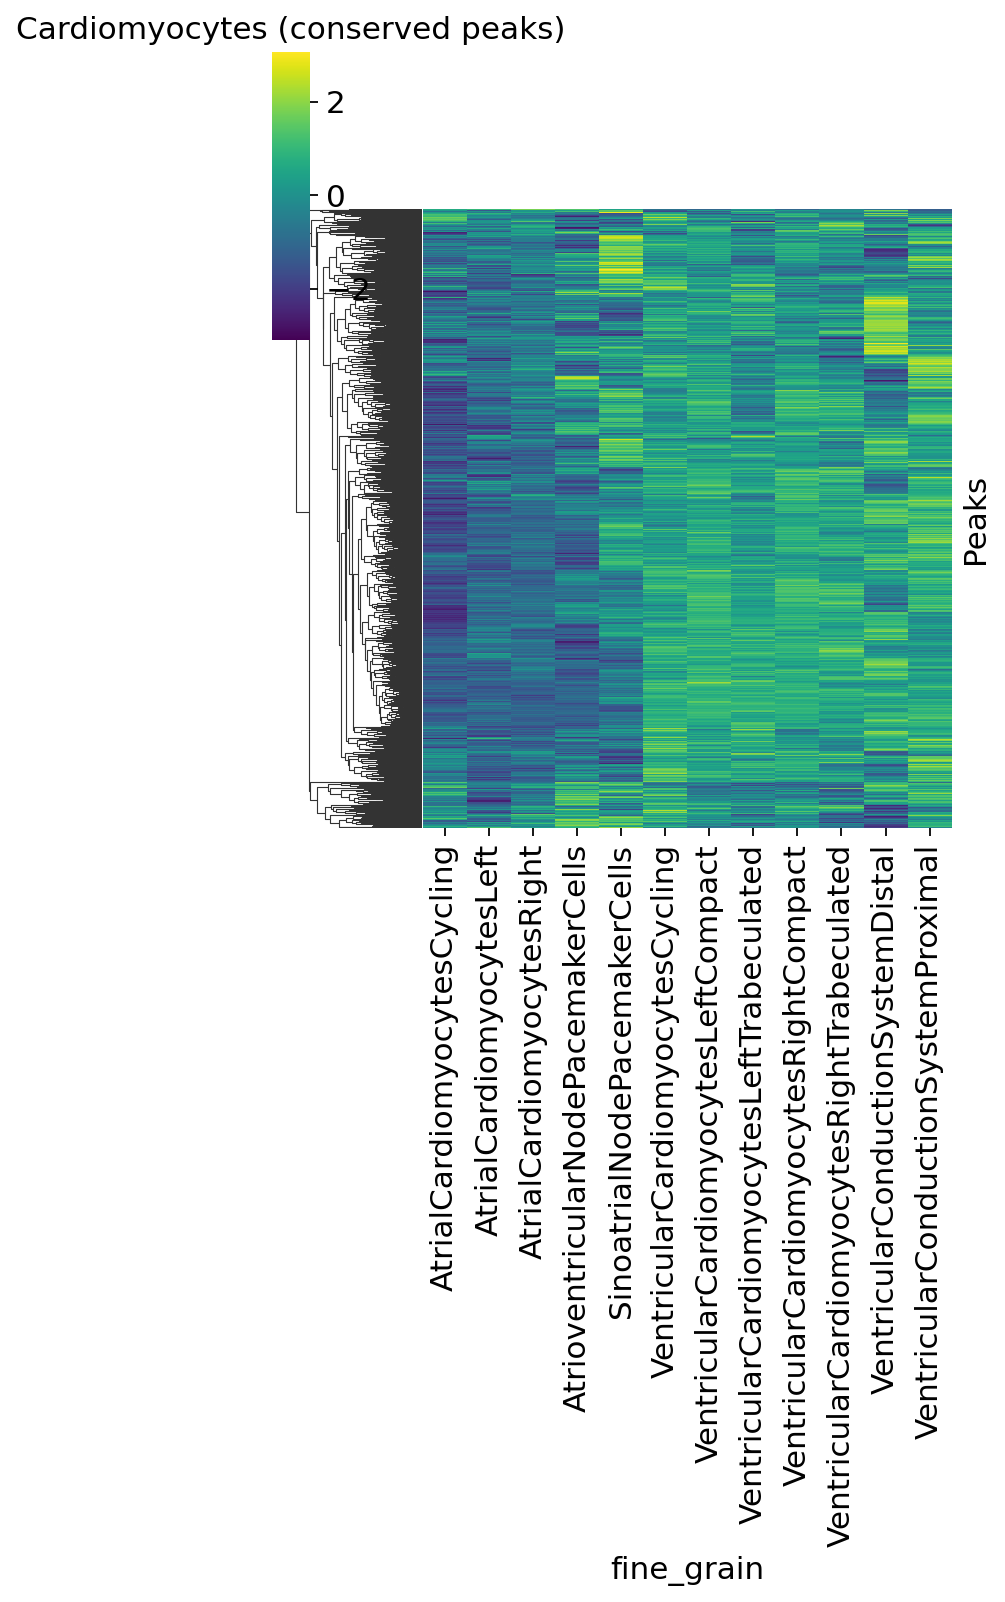


##### Leukocytes #####
specific peaks: 9013
conserved peaks: 84


/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


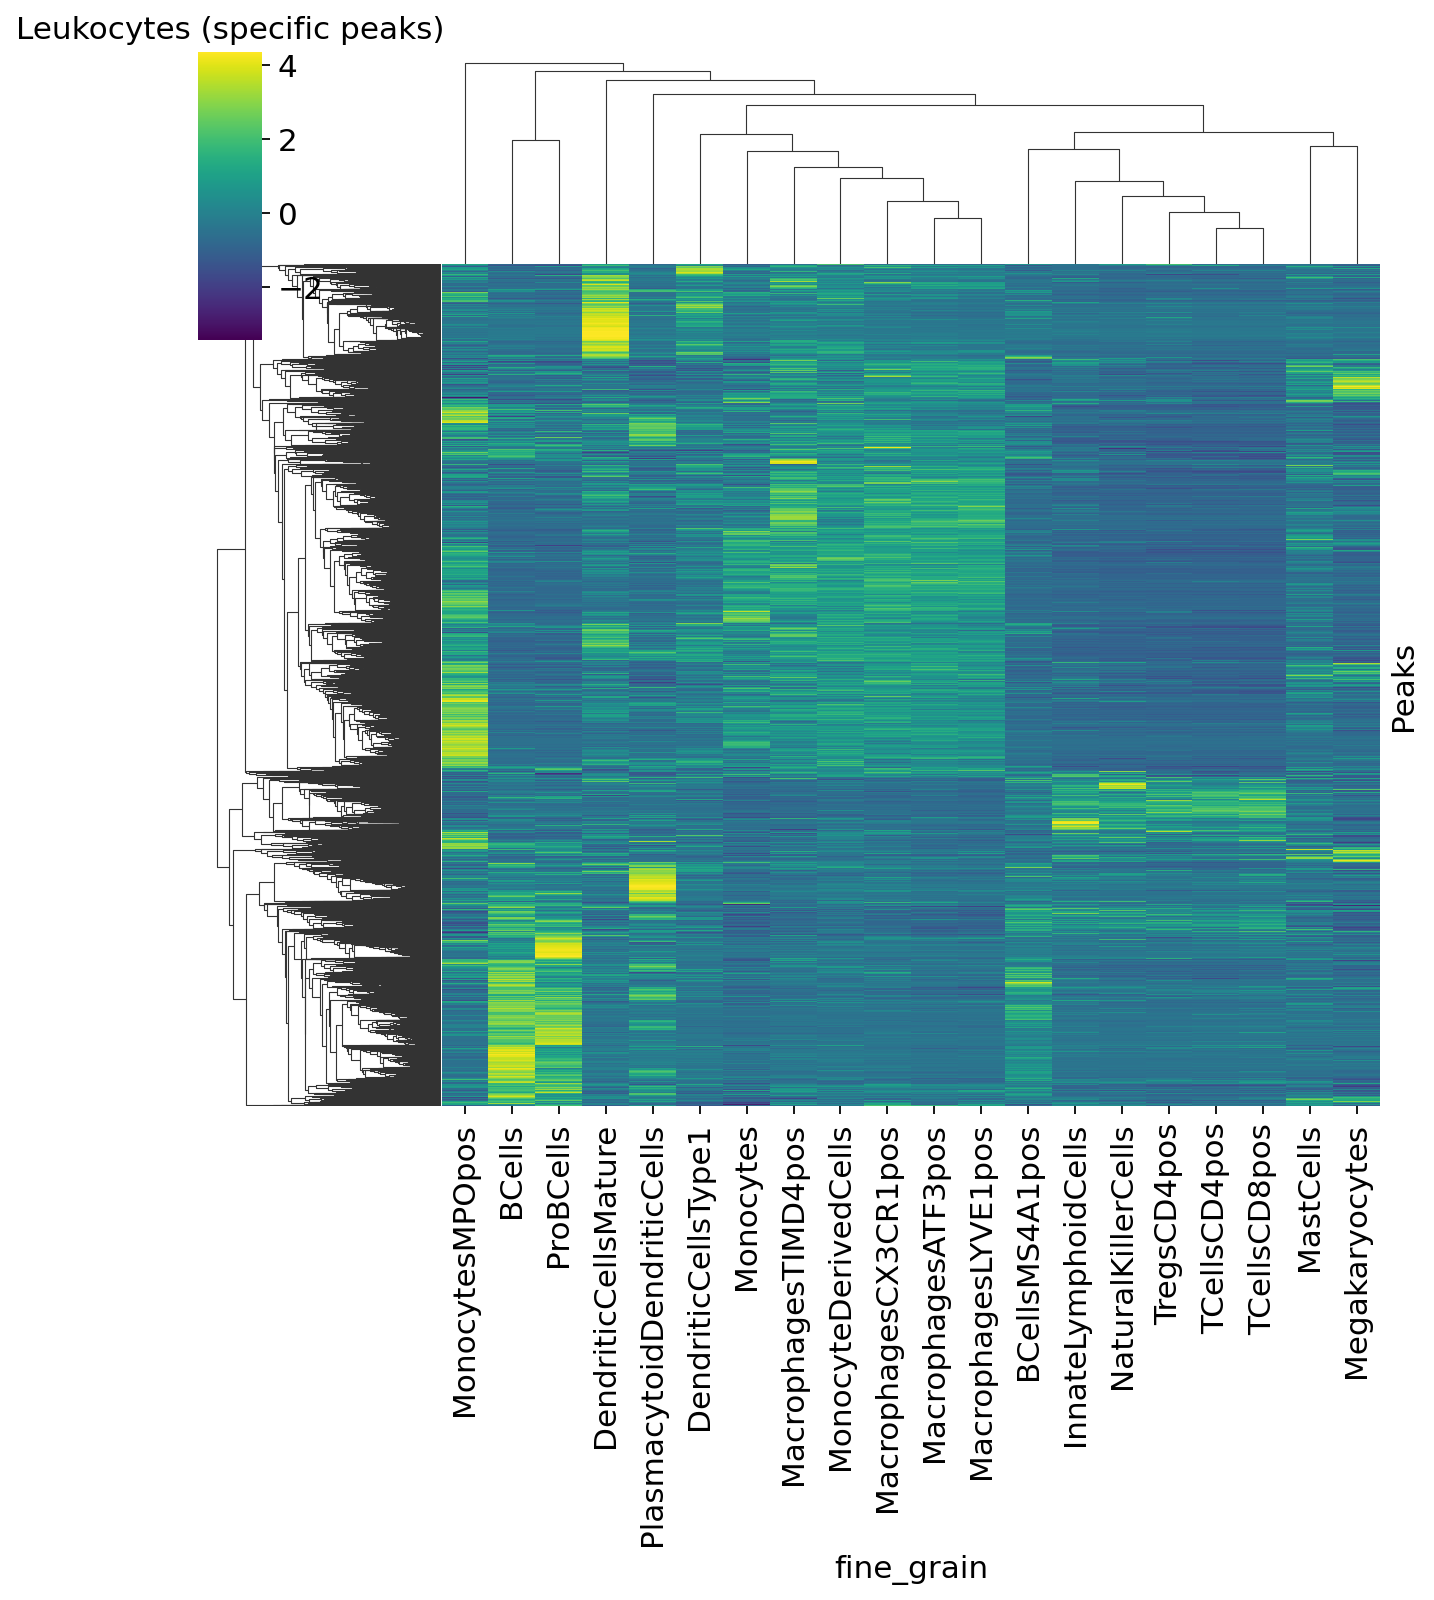

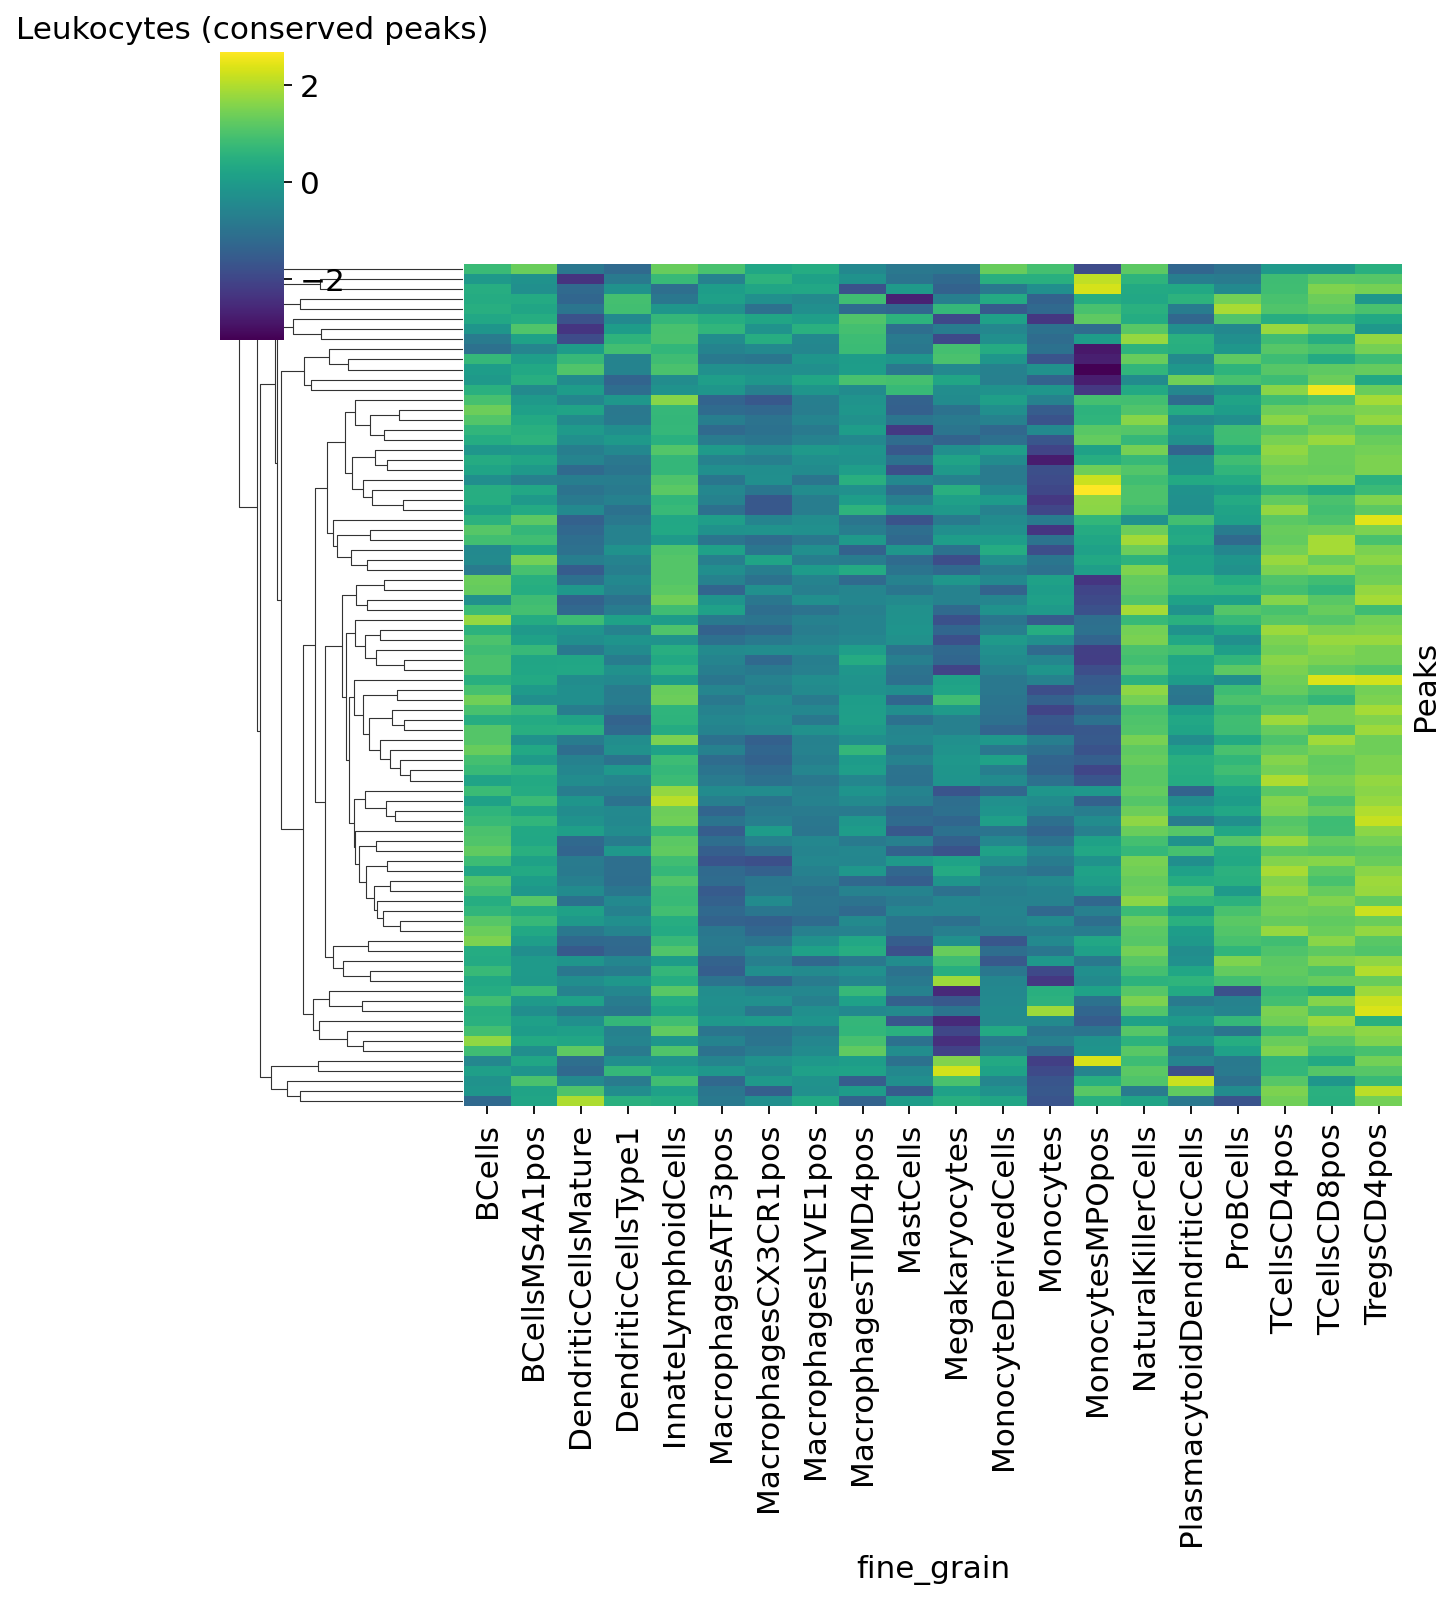


##### Endothelium #####
specific peaks: 1535
conserved peaks: 941


/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


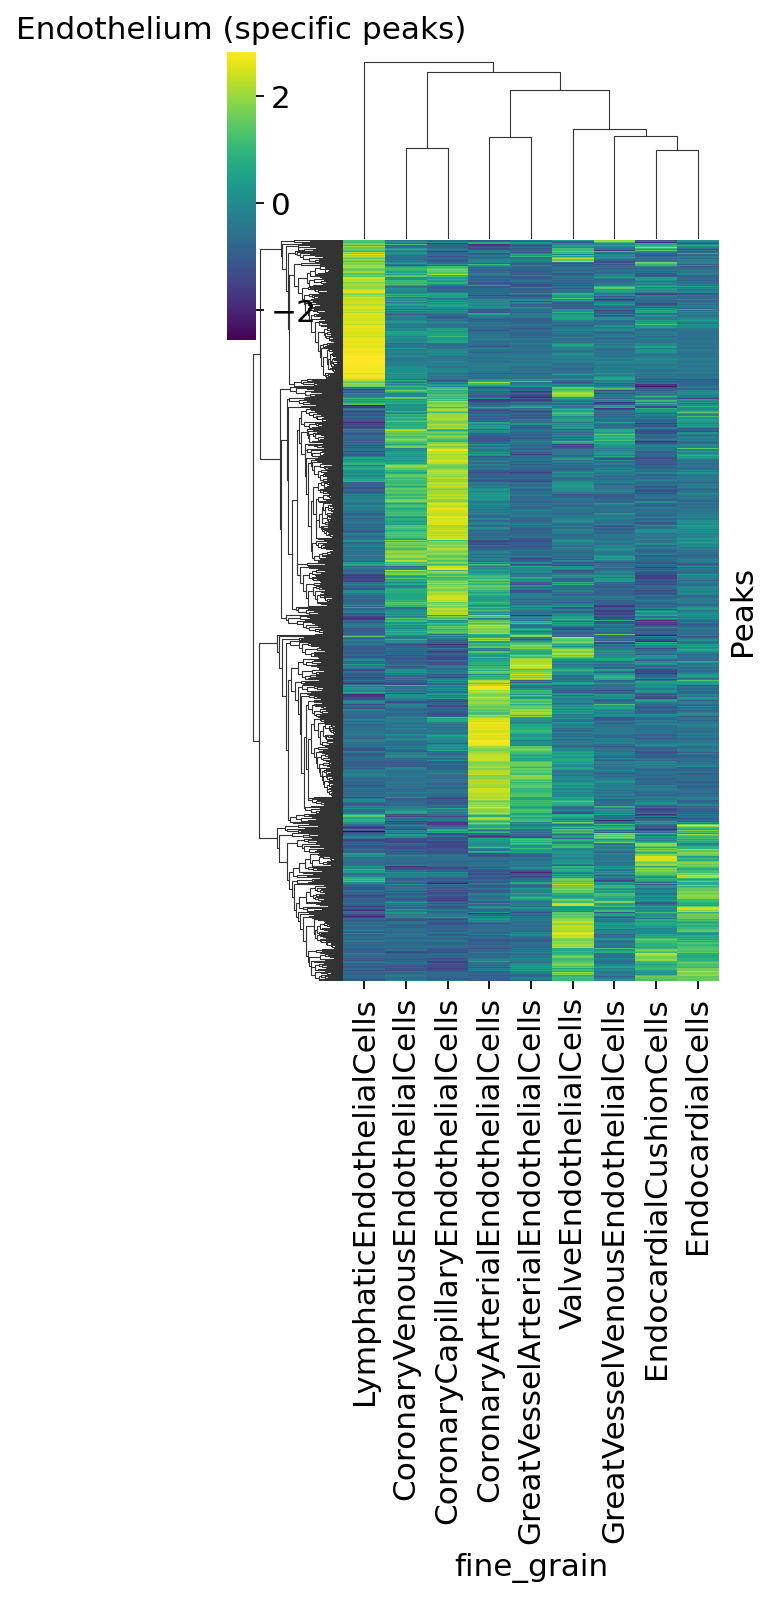

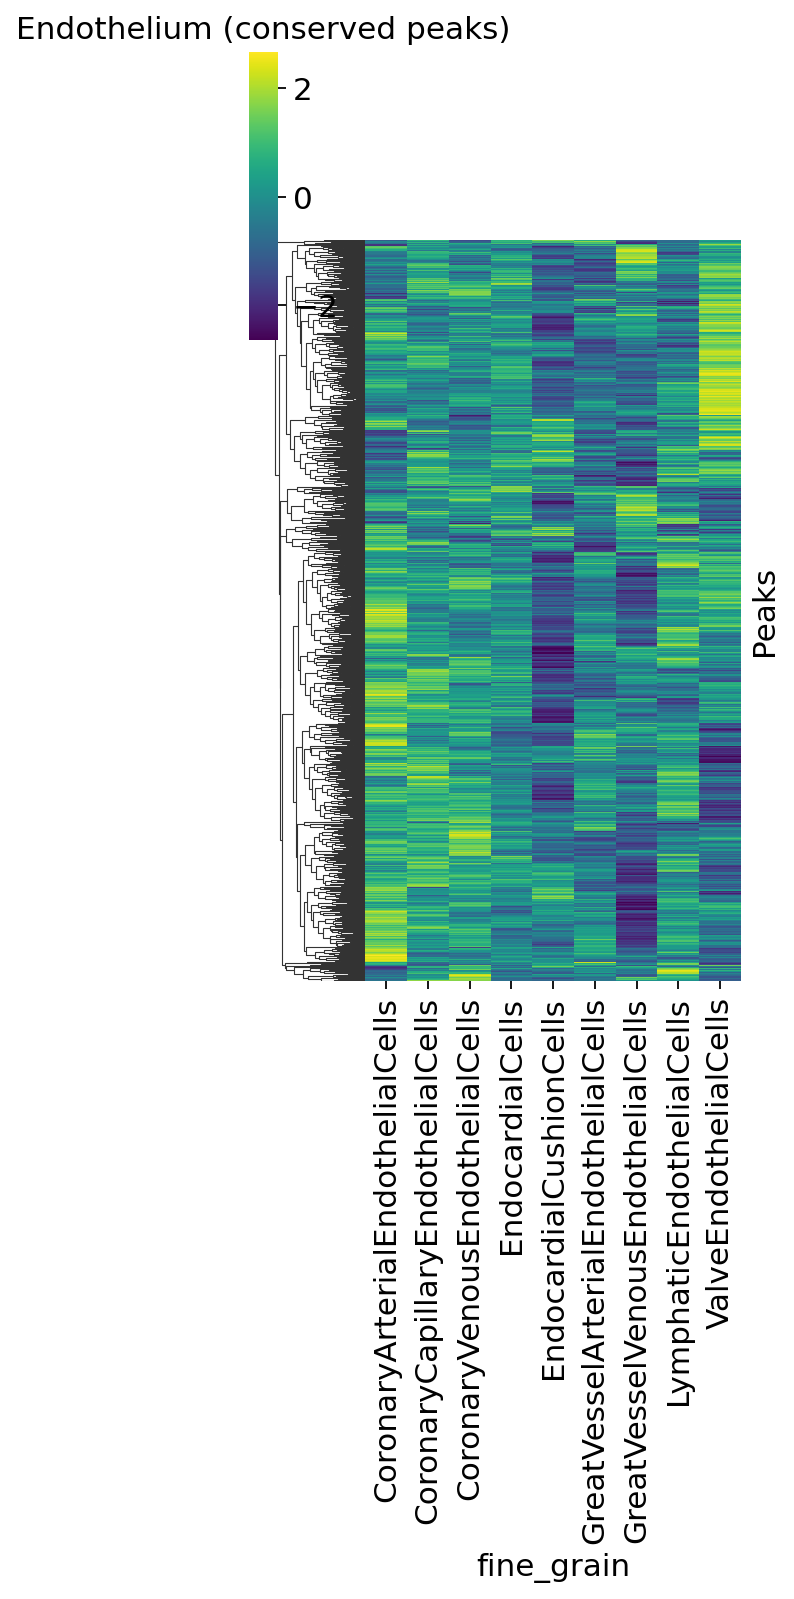


##### Epicardium #####
specific peaks: 1
conserved peaks: 8794
##### Neural #####
specific peaks: 2069
conserved peaks: 2361


/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


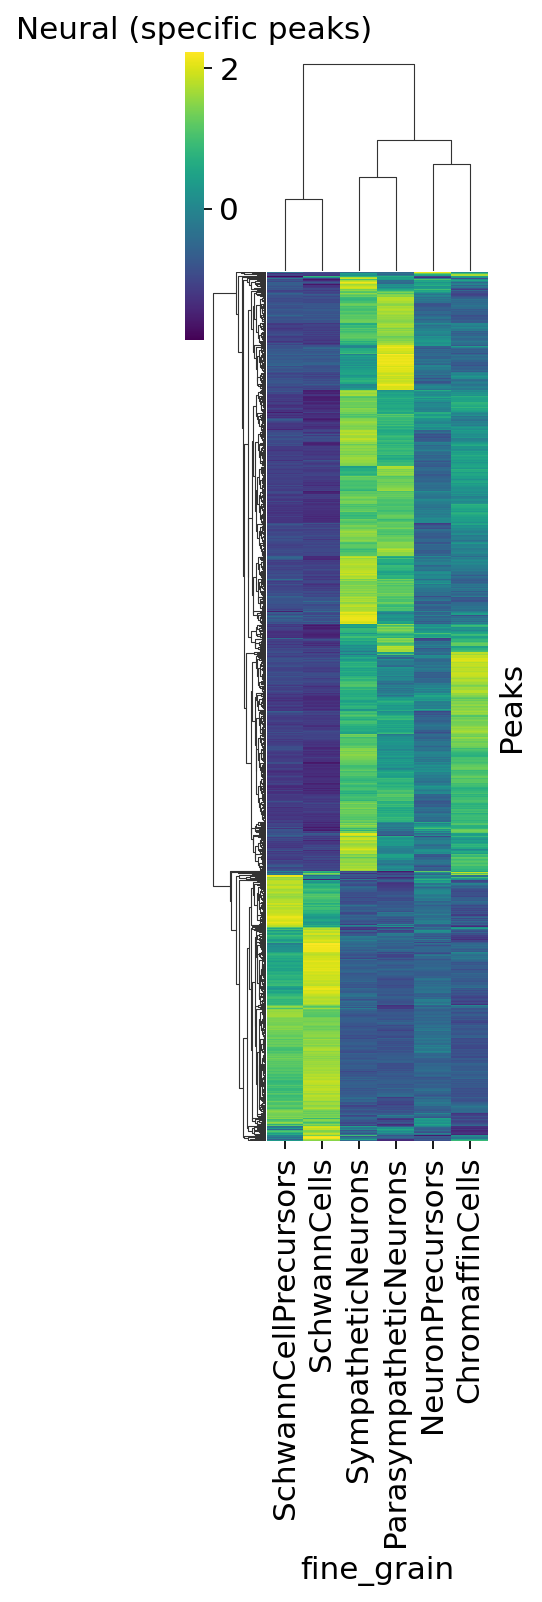

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


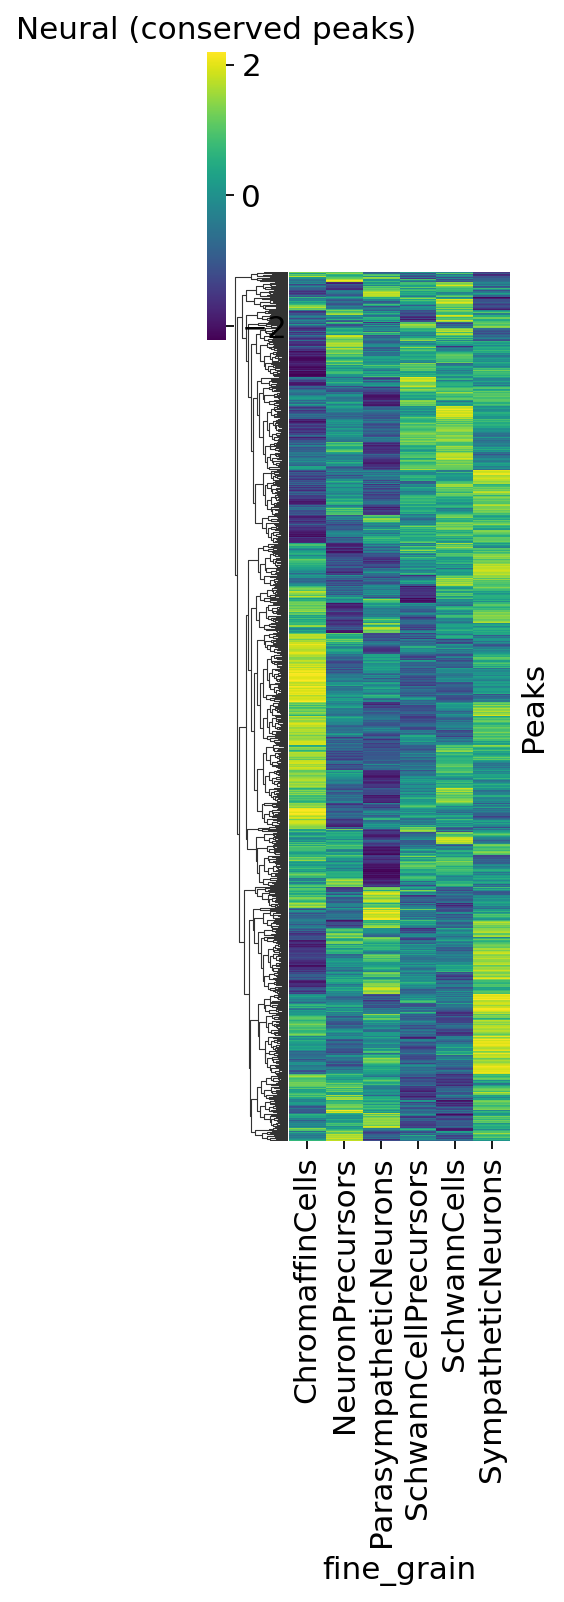

In [27]:
from scipy.stats import zscore
plt.rcParams['axes.grid'] = False

# set variables
accessible_proportion_thresh = 0.1
pval_thresh = 0.05
logFC_thresh_specific = 1
logFC_thresh_conserved = 0.3 # conserved: peaks which are not significant and the logFC is lower than this threshold 

# for storing results
specific_peaks = {}
conserved_peaks = {}

for celltype in DAR_res.keys():
    print(f'##### {celltype} #####')
    
    res = DAR_res[celltype].copy()
    # rename fine_grain cell types
    res['celltype'] = [celltype_rename[x] for x in res['celltype']]
    
    # select peaks accessible in at least one fine grain cell type
    df = acc_mat[list(set(res['celltype']))]
    peaks_open = list(df.index[df.max(axis=1)>accessible_proportion_thresh])
    res = res[res['names'].isin(peaks_open)]
    
    # select specific peaks    
    res_spec = res[(res['FDR']<pval_thresh)&(res['Log2FC']>logFC_thresh_specific)]
    peaks_spec = list(set(res_spec['names']))
    specific_peaks[celltype] = peaks_spec
    print(f'specific peaks: {len(peaks_spec)}')
    
    # select conserved peaks  
    ## prepare pivot dataframe
    res_pivot_logFC = res.pivot(index='names',columns='celltype',values='Log2FC')
    res_pivot_pval = res.pivot(index='names',columns='celltype',values='FDR')
    ## select
    peaks_cons = list(res_pivot_logFC.index[(res_pivot_logFC.max(axis=1)<logFC_thresh_conserved)&\
                                            (res_pivot_pval.min(axis=1)>pval_thresh)])
    conserved_peaks[celltype] = peaks_cons
    print(f'conserved peaks: {len(peaks_cons)}')
    
    # prepare mean count dataframe
    peak_count_df = adata[:,peaks_spec+peaks_cons].to_df()
    peak_count_df['fine_grain'] = adata.obs['fine_grain']
    peak_count_df = peak_count_df.groupby('fine_grain').mean().T
    peak_count_df = peak_count_df[list(set(res['celltype']))]
    ## scale
    peak_count_df = peak_count_df.apply(zscore,axis=1)
    ## separate
    df_spec = peak_count_df.loc[peaks_spec]
    df_cons = peak_count_df.loc[peaks_cons]
    
    # plot specific peaks
    if len(df_spec)>1:
        sns.clustermap(df_spec,yticklabels=False,figsize=(len(set(res['celltype']))/2.5, 10),
                       cmap='viridis')
        plt.title(f'{celltype} (specific peaks)')
        plt.savefig(f'{figdir}/Peak-heatmap_specific_{celltype}.pdf', bbox_inches="tight",dpi=300)
        plt.show()
    else:
        continue
    
    if len(df_cons)>1:
        # reoirder columns
        l = list(df_cons.columns)
        l.sort()
        df_cons = df_cons[l]
        # plot
        sns.clustermap(df_cons,col_cluster=False,yticklabels=False,figsize=(len(set(res['celltype']))/2.5, 10),
                      cmap='viridis')
        plt.title(f'{celltype} (conserved peaks)')
        plt.show()
    else:
        continue
    
    print('')

# Proportion of peak types

* Epicardium only has one specific peak so remove from this analysis

/tmp/ipykernel_26894/2711423203.py:14: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  peak_meta['peakType'].cat.reorder_categories(['Promoter','Exonic','Intronic','Distal'],
/tmp/ipykernel_26894/2711423203.py:14: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  peak_meta['peakType'].cat.reorder_categories(['Promoter','Exonic','Intronic','Distal'],
/tmp/ipykernel_26894/2711423203.py:14: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  peak_meta['peakType'].cat.reorder_categories(['Promoter','Exonic','Intronic','Distal'],
/tmp/ip

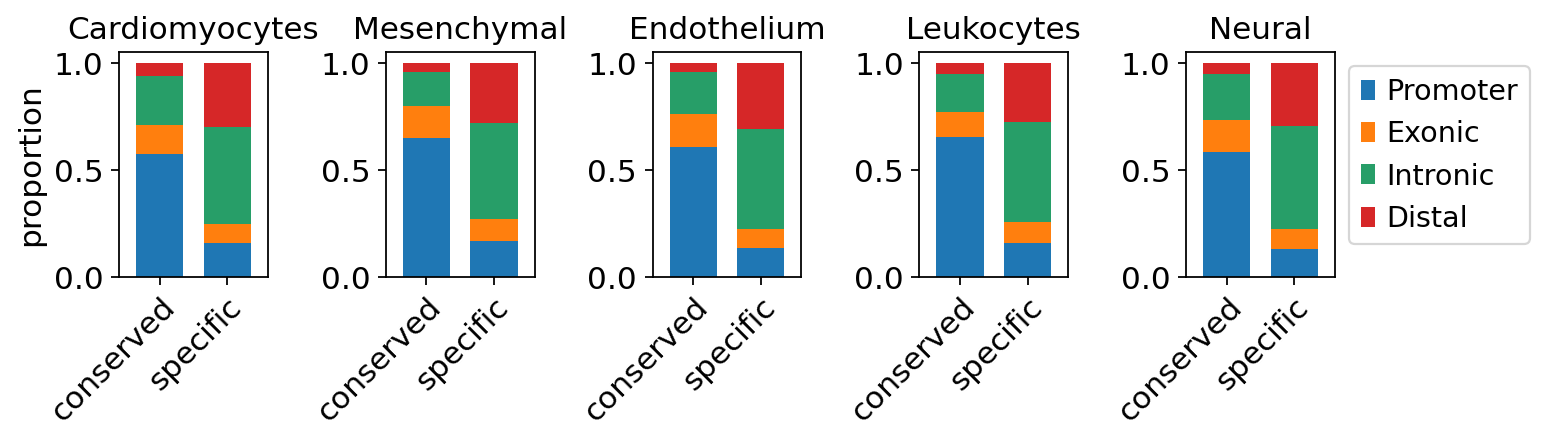

In [28]:
plt.rcParams['figure.figsize'] = 10,3
fig, axs = plt.subplots(nrows=1,ncols=5)

celltypes_to_plot = ['Cardiomyocytes', 'Mesenchymal', 'Endothelium','Leukocytes', 'Neural']
for i,celltype in enumerate(celltypes_to_plot):
    # prepare dataframe
    peak_meta = adata.var.copy()
    peak_meta['type'] = np.nan
    peak_meta.loc[specific_peaks[celltype],'type'] = 'specific'
    peak_meta.loc[conserved_peaks[celltype],'type'] = 'conserved'
    peak_meta.dropna(inplace=True)
    
    peak_meta['peakType'] = peak_meta['peakType'].astype('category')
    peak_meta['peakType'].cat.reorder_categories(['Promoter','Exonic','Intronic','Distal'],
                                            inplace=True)
    
    # plot
    if len(set(peak_meta['type']))==2:
        tmp = pd.crosstab(peak_meta['type'], peak_meta['peakType'], normalize='index')
        # tmp.plot.bar().legend(loc=1)
        tmp.plot.bar(stacked=True,width=0.7,ax=axs[i],legend=False)
        axs[i].grid(False)
        axs[i].set_title(celltype)
        axs[i].set_xlabel('')
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, 
                                  ha='right',rotation_mode='anchor')
        if i==0:
            axs[i].set_ylabel('proportion')
        else:
            axs[i].set_ylabel('')
        
        if i==(len(celltypes_to_plot)-1):
            axs[i].legend(bbox_to_anchor=(1.0, 1.0))
fig.tight_layout()
fig.savefig(f'{figdir}/Peak-barplot_conserved-specific_per-celltype.pdf', bbox_inches="tight",dpi=300)